In [35]:
#importing libraries we need 
import requests
import pandas as pd
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
#Gets the page in url variable
url = requests.get('https://en.wikipedia.org/wiki/Outline_of_academic_disciplines')
#Converting our page into text
soup = BeautifulSoup(url.text,'html.parser')

In [36]:
#To find main heading of the contents
div_toc = soup.find('div', attrs={'class': 'toc'})

#To find the index of headings 
span_number = soup.find_all('span', class_='tocnumber')

In [3]:
#print(len(span_number))

In [32]:
#Getting the index numbers and storing into the list
num_records = []
for i in range(0,36,1):
    all_number = span_number[i].text
    num_records.append(all_number)
#print(num_records)

In [33]:
#Getting the headings and storing into the list
records =[]
all_link = div_toc.find_all("a")
for link in all_link:
    records.append(link.get("href"))
#print(records)

In [34]:
#Removing the '#' from the headings and storing into another list
main = []
for text in records:
    data = text[1:]
    main.append(data)
#print(main)

In [37]:
#Storing our index and Content into the DataFrame
Content = pd.DataFrame()
Content['Index'] = num_records
Content['Heading'] = main
#Content

In [38]:
#Below line extracts the content we want from our page
div_main = soup.find_all('div', attrs={'class': 'div-col columns column-width'})

In [9]:
#print(len(div_main))
#21

In [39]:
#This is the function that extracts the data 
#We have to give titles for each of the column
#All the data is stored into the csv format file

df = pd.Series()
def getData(index):
    all_div = div_main[index]
    title = input("Please enter the heading")
    records =[]
    count = 0
    all_link = all_div.find_all("a")
    for link in all_link:
        records.append(link.get("title"))
        count+= 1
    df[title] = records
    df.to_csv('OutlineOfAcademicDisciplines.csv')
    return count

In [17]:
#Below for loop calls the function until all data is stored onto file
#Only call for loop when you want to again extract all the data
count_rows = []
'''for i in range(0,20,1):
    number = getData(i)
    count_rows.append(number)'''

In [40]:
#You can run the below line to find out exactly which data is on which index ex: getData(12) last index is 19 in this case
#getData(0)

In [22]:
#Titles for all the columns
titles = ['Performing Arts','Visual Arts','History','Home economics','Languages and literature','Law','Philosophy','Economics','Geography','Political science','Psychology','Sociology','Biology','Chemistry','Physics','Computer Science','Pure Mathematics','Applied Mathematics','Engineering and Technology','Medicine and Health']

In [41]:
#print(count_rows)
#print(titles)

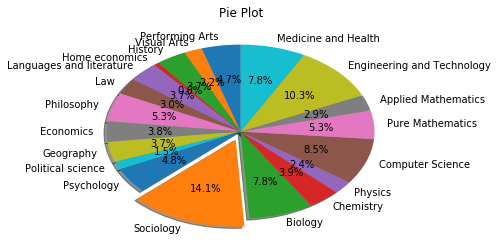

In [42]:
#In this scenario we are using pie chart to show the number of content each column has
plt.pie(
    count_rows,
    labels = titles,
    startangle = 90,
    shadow = True,
    explode = (0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0),
    autopct = '%1.1f%%'
)

plt.title('Pie Plot')
plt.show()